<a href="https://colab.research.google.com/github/DulanMahesh/ComputerVision/blob/main/ML_04_Clasification_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Classification Loss Functions

In this notebook, we will explore the common loss functions used for classification tasks in Deep Learning. We will explore the following loss functions here:

1. Binary Cross-Entropy
2. Categorical Cross-Entropy
3. Sparse Categorical Cross-Entropy

We will begin with implementing the loss functions from scratch, then move on to see how they can be called using the `tf.keras.losses` module from TensorFlow.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_02_binary_classification_loss.png' width=800 align='center'>

## Table of Contents
* [1 Binary Cross Entropy Loss](#1-Binary-Cross-Entropy-Loss)
* [2 Categorical Cross Entropy Loss](#2-Categorical-Cross-Entropy-Loss)
* [3 Sparse Categorical Cross Entropy Loss](#3-Sparse-Categorical-Cross-Entropy-Loss)
* [4 Implementing Loss Functions using tf.keras.losses Module](#4-Implementing-Loss-Functions-using-tf.keras.losses-Module)
    * [4.1 Keras Binary Cross Entropy Loss](#4.1-Keras-Binary-Cross-Entropy-Loss)
    * [4.2 Keras Categorical Cross Entropy Loss](#4.2-Keras-Categorical-Cross-Entropy-Loss)
    * [4.3 Keras Sparse Categorical Cross Entropy Loss](#4.3-Keras-Sparse-Categorical-Cross-Entropy-Loss)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

block_plot=False
plt.style.use('ggplot')

## 1 Binary Cross Entropy Loss
We use the Binary Cross Entropy loss function while solving the binary classification problem in deep learning. In this case, the ground truth labels can either be 0 or 1.

In a binary classification problem we wish to maximize the probability of the correct label (`y`).

\begin{equation}
P(y|x) =\left\{\begin{array}{cc} y{'} & y=1\\ 1-y{'} & y=0 \end{array} \right.
\end{equation}

Where `y'` represents the predicted class label for the positive class (`y = 1`). And therefore, `(1 - y')` represents the probability of the negative class (`y = 0`).

In simple words, the model outputs a single probability value for the predicted y. If the ground truth label is 1, then we take the predicted value as it is considering it as the probabilty for positive class. But if the corresponding ground truth label is 0, then we subtract the predicted value from 1 to get the probability of the positive class. This way we slowly try to maximize the probability for the correct label.

The following the formula for Binary Cross Entropy Loss:
$$
J(y') = -y\log(y') - (1-y)\log(1-y')
$$

As we have only two classes here, we can also break the above equation in the following manner:

\begin{equation}
J(y^{'})=\left\{\begin{array}{cc} -\log(y^{'}) & y=1\\ -\log(1-y{'}) & y=0 \end{array} \right. \label{eq2}
\end{equation}

We can also plot the curve for the same.

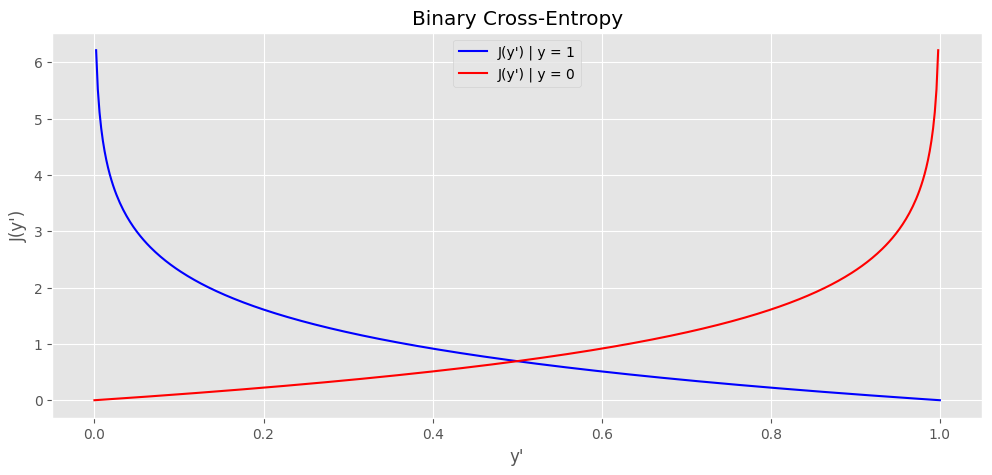

In [ ]:
# Cross entropy plot y =1
plt.rcParams["figure.figsize"] = (12, 5)
x = tf.linspace(0, 1, 500)
y1 = -tf.math.log(x)
y0 = -tf.math.log(1 - x)

plt.figure
plt.plot(x, y1, color="b", label="J(y') | y = 1")
plt.plot(x, y0, color="r", label="J(y') | y = 0")
plt.xlabel("y'")
plt.ylabel("J(y')")
plt.legend(loc="upper center")
plt.title("Binary Cross-Entropy")
plt.show(block=block_plot)
plt.close()

Let's see what is happening in the above curve.

Supposing that a sample belongs to class `1` <font color="CornFlowerBlue">(Blue Curve)</font>. If the output of the network is close to `0`, then from the above diagram we can see that the loss will be very high (The blue curve can go to infinity). Conversely, the loss is `0` if the output of the network is `1`. And we can apply a similar logic for the <font color="DarkOrange">red curve</font>.

So, for the binary classification, the error is high when the predicted output is different from the ground truth and vice-versa.

In [ ]:
def binary_crossentropy(y_true, y_pred):
    # Convert ground truth and predictions to Tensor.
    y_true = tf.convert_to_tensor(y_true)
    y_pred = tf.convert_to_tensor(y_pred)
    loss = -(
        (1.0 - y_true) * tf.math.log(1.0 - y_pred)) \
        - (y_true * tf.math.log(y_pred)
    )
    loss = tf.reduce_mean(loss)
    return loss

Let's start with an example, where the prediction is correct. Here, we take a simple example and try to classify whether the image is of a chair or not.
Simply, it can be **chair (label 1)** or **not chair (label 0)**.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_02_binary_classification_chair_example.jpg' width=500 align='center'>

In [ ]:
# Ground truth of a sample where the label is positive.
# Batch size is 1 and number of samples is 1.
y_true = [[1.]]
# The prediction close to 1 so the loss would be close to 0.
y_pred = [[0.95]]
bce_loss = binary_crossentropy(y_true, y_pred)
print(bce_loss.numpy())

0.051293306


In the above example, we can see that the loss is 0.051 which is close to 0. Now, let's take another example, where the grund truth label is 1 (indicating that is a **chair**), but the prediction is wrong.

In [ ]:
# Ground truth of a sample where the label is positive.
y_true = [[1.0]]
# The prediction is much cloder to 0 this time.
y_pred = [[0.05]]
bce_loss = binary_crossentropy(y_true, y_pred)
print(bce_loss.numpy())

2.9957323


As expected we get a very high loss compared to the previous case. This is becasue the model predicted the wrong result.

For one final example, now, let's take a case where the ground truth label is 0, indicating that is not a chair. Also, here, the prediction is correct.

In [ ]:
# Ground truth of a sample where the label is positive.
y_true = [[0.0]]
# The prediction is 0.06
y_pred = [[0.06]]
bce_loss = binary_crossentropy(y_true, y_pred)
print(bce_loss.numpy())

0.061875407


As we can see, when the ground truth label is 0 and model also predicted it correctly, in that case also, the loss will very small.

## 2 Categorical Cross Entropy Loss
Categorical Cross Entropy loss is used in the case of multi-class classification problem. Here, the index of the positive class in the ground truth labels is always 1.

For example, let's say that we have three classes (class 0, class 1, class 2) and 2 samples. Assume that the first sample belongs to class 1. Then, the ground truth vector will be the following:

`[0, 1.0, 0]`

The index representing the ground truth class will be 1 and all else will be 0. This is also called an **one-hot encoded vector**.

When the model predicts the values for each class, it will be between 0 and and 1 giving the probability of each class being correct. Let's consider that the model predicts the correct class for the sample. And we know that it belongs to class 1. So, in the output vector, the value at index 1 should have the highest value. Maybe something like the following:

`[0.1, 0.8, 0.1]`

The other two classes have lower scores than the true class.

The following the formula for Categorical Cross-Entropy loss:

$$
Categorical \ Cross \ Entropy = -\sum_{i=1}^{n}(p_i*log(q_i)), for \ n \ classes
$$

where $p$ is the vector containing the ground truth labels and $q$ is the vector containing the softmax probabilties of the output predictions. This brings to us the next detail we need to focus on. Here, we have multiple classes. And to calculate the loss, we sum over all the classes.

In fact, we can also use Categorical Cross Entropy Loss function with label smoothing for the classes. The ground truths can be soft-labels instead of one-hot encoded labels. For example, [0.8, 0.1, 0.1] is an exmaple of a soft-label for a sample which belongs to class 0 and the dataset has a total of 3 classes.

Although here, we will take a look at examples using one-hot encoded labels only.

And the following function implements the Categorical Cross Entropy loss.

In [ ]:
def categorical_crossentropy(y_true, y_pred):
    # Convert ground truth and predictions to Tensors.
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
    loss = -(y_true*tf.math.log(y_pred))
    flattened_loss = tf.reshape(loss, -1)
    final_loss = [i for i in flattened_loss if i != 0]
    final_loss = sum(final_loss)/len(final_loss)
    return final_loss

Now, we will try to replicate a few cases by taking a small example. Let's say that our three classes are **car (class 0)**, **truck (class 1)**, and **bike (class 2)**.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_02_categorical_cross_entropy_example.jpg' width=550 align='center'>

We will begin with an example where the sample belongs to class 0, that is car, and the predicted output is also correct. So, for the one-hot encoded ground truth vector, the value at first index will be 1, and all else will be 0. Similarly, for the predicted vector, the first index position value will have the highest value.

In [ ]:
y_true = [[1.0, 0, 0]]
y_pred = [[0.90, 0.05, 0.05]]
cce_loss = categorical_crossentropy(y_true, y_pred)
print(cce_loss.numpy())

0.105360545


In this case, we got a loss of around 0.105. Hopefully, this is a good value when the prediction is correct. To confirm, let's take another example, where the prediction is wrong. If we get a higher loss, that would mean that the above loss is in the expected range when the prediction is correct.

In [ ]:
# Sample belongs to class 0.
y_true = [[1.0, 0, 0]]
# Model predicted it as class 1.
y_pred = [[0.025, 0.95, 0.025]]
cce_loss = categorical_crossentropy(y_true, y_pred)
print(cce_loss.numpy())

3.6888795


Ok, this time with wrong prediction, is higher than the previous case. So, the previous loss for the correct prediction was in fact within the expected range.

But what if the model predicts the correct class but only just with a bit more confidence than the other values. Meaning, the value at the correct class index will be highest but the other two values will also be nearer to that, In that case, most probably, the loss will be very near to 1. Maybe slightly more than or less than 1. Lets, try that out.

In [ ]:
# Sample belongs to class 1.
y_true = [[0, 1.0, 0]]
# Prediction is correct, but model is not very confident.
y_pred = [[0.3, 0.40, 0.3]]
cce_loss = categorical_crossentropy(y_true, y_pred)
print(cce_loss.numpy())

0.9162907


We got a loss of around 0.91.

We can get a sense of how the loss value gets impacted with the change in prediction. For one final example, let's check out the loss if the model predicts each class with equal confidence.

In [ ]:
# Sample belongs to class 1.
y_true = [[0, 1.0, 0]]
# The model predicted all classes with euqal confidence.
y_pred = [[0.333, 0.333, 0.333]]
cce_loss = categorical_crossentropy(y_true, y_pred)
print(cce_loss.numpy())

1.0996127


This time, we get a value just near to 1.1. We can infer at least one thing from this. For the loss to be as low as possible, the predicted value for the correct class should be as high, and the predicted value for the other classes should be as low as possible.

## 3 Sparse Categorical Cross Entropy Loss
For Sparse Categorical Cross Entropy loss, the format of the ground truth labels change a bit.

Unlike Categorical Cross Entropy, here, the ground truth vector directly contains the class number. So, if we have three classes in total (0, 1, and 2) and two data points (samples), then the ground truth vector, where classes 1 and 2 are the true labels will be:

`[1, 2]`

We generally use Sparse Categorical Cross Entropy when the samples are mutually exclusive. This means that each sample can belong to one class. Therefore, we can represent the class it belongs to using just a single integer.

So, the ground truth labels are simply integers instead of one-hot encoded vectors. The format of the predictions remain unchanged compared to Categorical Cross Entropy. **Also, this has a few benefits compared to Categorical Cross Entropy. When we have hundreds of classes, one-hot encoding takes more time and memory as we have encode for all the classes. But in the case of Sparse Categorical, we just have a single vector where each element specifies the class number for sample. Thus, conserving time and memory during calculation of loss.**

The following code block shows the manual implementation of Sparse Categorical Cross Entropy loss.

In [ ]:
def sparse_categorical_crossentropy(y_true, y_pred):
    num_samples = len(y_true)
    loss = []
    # Loop over the number of samples.
    for i in range(num_samples):
        y_pred_sample = y_pred[i] # The current prediction.
        y_true_sample = y_true[i] # The current ground-truth.

        # Loss for current iteration.
        iter_loss = -tf.math.log(y_pred_sample[y_true_sample])

        # Append sampe_loss to the loss list
        loss.append(iter_loss)

    loss = tf.reduce_mean(loss)
    return loss

Here, let's try to replicate the cases we had in Categorical Cross Entropy. Starting with when class 0 is the ground truth for the sample.

In [ ]:
y_true = [0]
y_pred = [[0.90, 0.05, 0.05]]
scce_loss = sparse_categorical_crossentropy(y_true, y_pred)
print(scce_loss.numpy())

0.105360545


Now, when the sample belongs to class 0, but prediction is wrong.

In [ ]:
# Sample belongs to class 0.
y_true = [0]
# Model predicted it as class 1.
y_pred = [[0.025, 0.95, 0.025]]
scce_loss = sparse_categorical_crossentropy(y_true, y_pred)
print(scce_loss.numpy())

3.6888795


Moving on to when sample belongs to class 1, the prediction is correct, but model not too confident.

In [ ]:
# Sample belongs to class 1.
y_true = [1]
# Prediction is correct, but model is not very confident.
y_pred = [[0.3, 0.40, 0.3]]
scce_loss = sparse_categorical_crossentropy(y_true, y_pred)
print(scce_loss.numpy())

0.9162907


Finally, when model predicts everything with equal confidence,

In [ ]:
# Sample belongs to class 1.
y_true = [1]
# Prediction is correct, but model is not very confident.
y_pred = [[0.333, 0.333, 0.333]]
scce_loss = sparse_categorical_crossentropy(y_true, y_pred)
print(scce_loss.numpy())

1.0996127


As you can see, for the same set of ground truth and predicted values (in their respective correct format), both, Categorcal Cross Entropy and Sparse Categorical Cross Entropy give the same output. This is expected and also a good way to check the manual implementation of out loss fuctions.

## 4 Implementing Loss Functions using tf.keras.losses Module
In the previous section, we saw how to implement the common classification loss functions manually using the `tf.math` modules and functions.

But TensorFlow provides the `tf.keras.losses` module which already has everything defined for us. Now, let's cross-check using the `tf.keras.losses` whether all our implementation are correct or not.

### 4.1 Keras Binary Cross Entropy Loss

In [ ]:
y_true = [[1.]]
y_pred = [[0.95]]

y_true = tf.convert_to_tensor(y_true)
y_pred = tf.convert_to_tensor(y_pred)

# Binary Cross Entropy
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce_loss = bce(y_true, y_pred)
print(bce_loss.numpy())

0.051293306


### 4.2 Keras Categorical Cross Entropy Loss

You might have noticed the `from_logits` argument that we are passing to the loss functions here. It is quite important to know that as well. There are two possible values we can pass to argument:
* `from_logits=False`: This indicates that the output of the neural network are already passed through an activation function. So, when calling the Keras loss function, it will not apply any action to the given prediction values.This is mainly the case we apply either the `sigmoid` or `softmax` activation to the last layer of the neural network.
* `from_logits=True`: This indicates that the prediction values that we pass to the Keras loss functions are raw outputs from the neural network and the last layer of the neural network did not contain any activation function.

In either case, we should get the same results. Let's check that out here.

In [ ]:
# Prediction values replicate logits from the last layer of the neural network.
y_true = [[1.0, 0, 0]]
y_pred = [[12., 5., 7.]]

y_true = tf.convert_to_tensor(y_true)
y_pred = tf.convert_to_tensor(y_pred)

# Categorical Cross Entropy
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
cce_loss = cce(y_true, y_pred)
print(cce_loss.numpy())

0.007620668


In [ ]:
y_true = [[1.0, 0, 0]]
# The following are the softmax prediction values of [[12., 5., 7.]]
y_pred = [[0.99240828, 0.00090495922, 0.0066867946]]

y_true = tf.convert_to_tensor(y_true)
y_pred = tf.convert_to_tensor(y_pred)

# Categorical Cross Entropy
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
cce_loss = cce(y_true, y_pred)
print(cce_loss.numpy())

0.007620688


As you can see, in both cases we have the same loss value except the last two decimal places which will be pretty insignificant in a real-world use case.

In [ ]:
y_true = [[1.0, 0, 0]]
y_pred = [[0.90, 0.05, 0.05]]

y_true = tf.convert_to_tensor(y_true)
y_pred = tf.convert_to_tensor(y_pred)

# Categorical Cross Entropy
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
cce_loss = cce(y_true, y_pred)
print(cce_loss.numpy())

0.105360545


### 4.3 Keras Sparse Categorical Cross Entropy Loss

In [ ]:
y_true = [0]
y_pred = [[0.90, 0.05, 0.05]]

y_true = tf.convert_to_tensor(y_true)
y_pred = tf.convert_to_tensor(y_pred)


# Sparse Categorical Cross Entropy
scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
scce_loss = scce(y_true, y_pred)
print(scce_loss.numpy())

0.10536056


All the loss values from the `tf.keras.losses` modules match the ones from our manual implementation. But you can see how easily we can invoke the Keras module loss functions and get the answers with just one line of code. For large scale problems, it is always advisable to use the predefined loss functions to avoid unnecesarry confusion and errors.